In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
from dataframe_checks import check_time_column, check_col_types, check_missing_values, data_report, plot_time_series, check_column_order

# Daily Climate time series data

Getting data and shaping it.

In [2]:
types = {'meantemp': np.float64, 'humidity': np.float64, 'wind_speed': np.float64, 'meanpressure': np.float64}
dcts_test = pd.read_csv('datasets/raw/Daily Climate time series data/DailyDelhiClimateTest.csv', parse_dates=['date'], dtype=types)
dcts_train = pd.read_csv('datasets/raw/Daily Climate time series data/DailyDelhiClimateTrain.csv', parse_dates=['date'], dtype=types)
dcts = pd.concat([dcts_train, dcts_test,], ignore_index=True).sort_values(by='date', ascending=True)

Data report on current data.

In [3]:
data_report(dcts,'date', 'D')

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 1
5. Number of Time Series with missing values : 0
________________________________________________________________


Fix issues reported on Data Report.

In [4]:
correct4 = check_time_column( dcts, time_col_name="date", freq="D", fix = True)
correct4

3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 1


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1571,2017-04-20,34.500000,27.500000,5.562500,998.625000
1572,2017-04-21,34.250000,39.375000,6.962500,999.875000
1573,2017-04-22,32.900000,40.900000,8.890000,1001.600000
1574,2017-04-23,32.875000,27.500000,9.962500,1002.125000


Final report on corrected data.

In [5]:
data_report(correct4,'date', 'D')

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [6]:
#correct4.to_csv('datasets/processed_data/DailyDelhiClimate_12052024.csv', index=False)

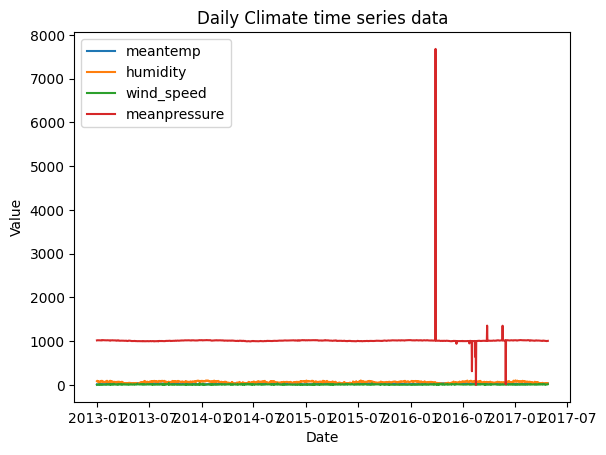

In [7]:
plot_time_series(correct4, title="Daily Climate time series data")

# Time Series Price Vegetables and Fruits

In [8]:
types = {'Commodity': str, 'Average': np.float64}
tspvf = pd.read_csv('datasets/raw/Time Series Price Vegetables and Fruits/kalimati_tarkari_dataset.csv', parse_dates=['Date'], index_col='SN', dtype=types)
tspvf = tspvf.drop(columns=['Minimum',	'Maximum', 'Unit'])
tspvf

,Commodity,Date,Average
SN,,,
0,Tomato Big(Nepali),2013-06-16,37.5
1,Tomato Small(Local),2013-06-16,29.0
2,Potato Red,2013-06-16,20.5
3,Potato White,2013-06-16,15.5
4,Onion Dry (Indian),2013-06-16,29.0
...,...,...,...
197156,Garlic Dry Nepali,2021-05-13,110.0
197157,Fish Fresh(Rahu),2021-05-13,275.0
197158,Fish Fresh(Bachuwa),2021-05-13,230.0


In [9]:
tspvf1 = pd.pivot_table(tspvf, index = 'Date', columns='Commodity', values='Average')
tspvf1.reset_index(inplace=True)
tspvf1

Commodity,Date,Apple(Fuji),Apple(Jholey),Arum,Asparagus,Bakula,Bamboo Shoot,Banana,Barela,Bauhania flower,...,Tomato Big(Nepali),Tomato Small(Indian),Tomato Small(Local),Tomato Small(Terai),Tomato Small(Tunnel),Turnip,Turnip A,Water Melon(Dotted),Water Melon(Green),Yam
0,2013-06-16,NaN,110.0,NaN,125.0,NaN,55.0,75.0,NaN,NaN,...,37.5,NaN,29.0,NaN,NaN,47.5,42.5,NaN,16.5,NaN
1,2013-06-17,NaN,120.0,NaN,125.0,NaN,55.0,75.0,NaN,NaN,...,27.5,NaN,22.5,NaN,NaN,NaN,47.5,NaN,15.0,NaN
2,2013-06-18,NaN,115.0,NaN,110.0,NaN,55.0,75.0,NaN,NaN,...,27.5,NaN,24.0,NaN,NaN,47.5,47.5,NaN,13.5,NaN
3,2013-06-19,NaN,115.0,NaN,112.5,NaN,55.0,75.0,NaN,NaN,...,27.5,NaN,26.0,NaN,NaN,47.5,47.5,NaN,15.0,NaN
4,2013-06-20,NaN,115.0,NaN,110.0,NaN,55.0,75.0,NaN,NaN,...,27.5,NaN,24.0,NaN,NaN,42.5,55.0,NaN,15.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748,2021-05-09,255.0,NaN,55.0,900.0,NaN,95.0,105.0,75.0,NaN,...,NaN,NaN,12.5,17.5,17.5,NaN,75.0,NaN,42.5,NaN
2749,2021-05-10,270.0,NaN,55.0,950.0,NaN,NaN,95.0,75.0,NaN,...,NaN,17.5,12.5,17.5,17.5,NaN,75.0,NaN,37.5,NaN
2750,2021-05-11,265.0,NaN,NaN,1100.0,NaN,95.0,95.0,75.0,NaN,...,NaN,17.5,12.5,21.5,21.5,NaN,75.0,NaN,40.0,NaN
2751,2021-05-12,NaN,265.0,NaN,1100.0,NaN,95.0,105.0,75.0,NaN,...,47.5,27.5,32.5,32.5,37.5,NaN,75.0,NaN,32.5,NaN


In [10]:
data_report(tspvf1,'Date', 'D', business_days=True)

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: -689
4. Number of duplicated timesteps: 0
Number of missing values in column 'Apple(Fuji)' : 2358
Number of missing values in column 'Apple(Jholey)' : 70
Number of missing values in column 'Arum' : 733
Number of missing values in column 'Asparagus' : 1698
Number of missing values in column 'Bakula' : 1622
Number of missing values in column 'Bamboo Shoot' : 9
Number of missing values in column 'Banana' : 9
Number of missing values in column 'Barela' : 1363
Number of missing values in column 'Bauhania flower' : 2467
Number of missing values in column 'Bitter Gourd' : 83
Number of missing values in column 'Bottle Gourd' : 53
Number of missing values in column 'Brd Leaf Mustard' : 11
Number of missing values

In [11]:
tspvf3 = check_time_column(
    tspvf1,
    time_col_name="Date",
    freq="D", fix=True
)

3. Number of missing timesteps: 136
4. Number of duplicated timesteps: 0


In [12]:
data_report(tspvf3,'Date', 'D', business_days=True)

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: -825
4. Number of duplicated timesteps: 0
Number of missing values in column 'Apple(Fuji)' : 2494
Number of missing values in column 'Apple(Jholey)' : 206
Number of missing values in column 'Arum' : 869
Number of missing values in column 'Asparagus' : 1834
Number of missing values in column 'Bakula' : 1758
Number of missing values in column 'Bamboo Shoot' : 145
Number of missing values in column 'Banana' : 145
Number of missing values in column 'Barela' : 1499
Number of missing values in column 'Bauhania flower' : 2603
Number of missing values in column 'Bitter Gourd' : 219
Number of missing values in column 'Bottle Gourd' : 189
Number of missing values in column 'Brd Leaf Mustard' : 147
Number of missin

In [13]:
tspvf4 = check_missing_values(tspvf3, alpha=0.1, fix=True)

Number of missing values in column 'Apple(Jholey)' : 206
Number of missing values in column 'Bamboo Shoot' : 145
Number of missing values in column 'Banana' : 145
Number of missing values in column 'Bitter Gourd' : 219
Number of missing values in column 'Bottle Gourd' : 189
Number of missing values in column 'Brd Leaf Mustard' : 147
Number of missing values in column 'Brinjal Long' : 153
Number of missing values in column 'Cabbage(Local)' : 140
Number of missing values in column 'Capsicum' : 164
Number of missing values in column 'Carrot(Local)' : 153
Number of missing values in column 'Cauli Local' : 139
Number of missing values in column 'Chilli Dry' : 141
Number of missing values in column 'Chilli Green' : 154
Number of missing values in column 'Coriander Green' : 148
Number of missing values in column 'Cress Leaf' : 280
Number of missing values in column 'Cucumber(Local)' : 203
Number of missing values in column 'French Bean(Local)' : 150
Number of missing values in column 'Garlic 

In [14]:
data_report(tspvf4,'Date', 'D', business_days=True)

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: -825
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [15]:
tspvf4

,Date,Apple(Jholey),Bamboo Shoot,Banana,Bitter Gourd,Bottle Gourd,Brd Leaf Mustard,Brinjal Long,Cabbage(Local),Capsicum,...,Pomegranate,Potato Red,Pumpkin,Raddish White(Local),Spinach Leaf,Sugarbeet,Tamarind,Tofu,Tomato Small(Local),Water Melon(Green)
0,2013-06-16,110.0,55.0,75.0,15.0,17.5,47.5,17.0,8.0,57.5,...,210.0,20.5,19.0,27.5,52.5,37.5,67.5,57.5,29.0,16.5
1,2013-06-17,120.0,55.0,75.0,18.0,19.0,42.5,19.0,8.0,57.5,...,210.0,20.5,19.0,32.5,47.5,37.5,67.5,57.5,22.5,15.0
2,2013-06-18,115.0,55.0,75.0,19.0,23.0,42.5,22.5,9.0,57.5,...,210.0,19.5,19.0,32.5,47.5,37.5,67.5,57.5,24.0,13.5
3,2013-06-19,115.0,55.0,75.0,22.5,19.0,42.5,24.0,12.5,57.5,...,210.0,20.5,19.0,32.5,42.5,47.5,67.5,57.5,26.0,15.0
4,2013-06-20,115.0,55.0,75.0,22.5,22.5,42.5,22.5,12.5,52.5,...,195.0,20.5,19.0,30.0,47.5,37.5,67.5,57.5,24.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,2021-05-09,290.0,95.0,105.0,13.5,12.5,25.0,20.0,25.0,75.0,...,265.0,36.5,32.5,22.5,45.0,75.0,155.0,95.0,12.5,42.5
2885,2021-05-10,290.0,95.0,95.0,17.5,22.5,25.0,27.5,25.0,75.0,...,290.0,36.5,32.5,25.0,45.0,75.0,155.0,95.0,12.5,37.5
2886,2021-05-11,290.0,95.0,95.0,17.5,17.5,25.0,25.0,22.5,75.0,...,290.0,36.5,32.5,25.0,55.0,75.0,155.0,95.0,12.5,40.0
2887,2021-05-12,265.0,95.0,105.0,17.5,17.5,22.5,27.5,22.5,75.0,...,290.0,36.0,32.5,17.5,55.0,75.0,155.0,95.0,32.5,32.5


In [16]:
#tspvf4.to_csv('datasets/processed_data/kalimati_tarkari_dataset_12052024.csv', index=False)

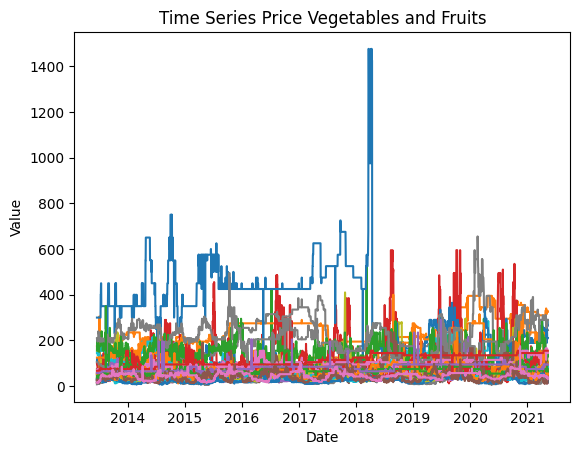

In [17]:
plot_time_series(tspvf4, legend=False, title="Time Series Price Vegetables and Fruits")

# Time Series Room Temperature Data

In [18]:
types = {'Hourly_Temp': np.float64}
tsrtd = pd.read_csv('datasets/raw/Time Series Room Temperature Data/MLTempDataset1.csv', parse_dates=['Datetime'], dtype=types, index_col=0)
tsrtd

,Datetime,Hourly_Temp
0,2022-01-04 00:00:00,20.867
1,2022-01-04 01:00:00,21.000
2,2022-01-04 02:00:00,20.867
3,2022-01-04 03:00:00,20.650
4,2022-01-04 04:00:00,20.400
...,...,...
7051,2022-10-24 19:00:00,25.567
7052,2022-10-24 20:00:00,25.183
7053,2022-10-24 21:00:00,24.600
7054,2022-10-24 22:00:00,23.986


In [19]:
data_report(tsrtd, "Datetime", freq='H', business_days=False)

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


c:\Users\User\Documents\Beatriz\timecave\experiments\dataframe_checks.py:90: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(


In [20]:
#tsrtd.to_csv('datasets/processed_data/MLTempDataset_13052024.csv', index=False)

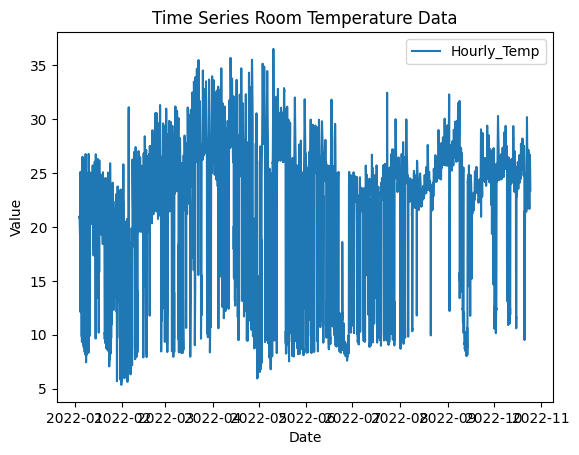

In [21]:
plot_time_series(tsrtd, title="Time Series Room Temperature Data")

# Time Series Air Quality Data of India (2010-2023)

Reading one of the datasets (AP004.csv) corresponding to the city: Rajamahendravaram, India.

In [22]:
types = {'Commodity': str, 'Average': np.float64}
tsaqdi = pd.read_csv('datasets/raw/Time Series Air Quality Data of India (2010-2023)/AP004.csv', parse_dates=['From Date', 'To Date'], dtype=types) 

In [23]:
# Checking if the difference between date columns is 1 hour
time_difference = tsaqdi['From Date'] - tsaqdi['To Date']
assert (time_difference == pd.Timedelta(hours=-1)).all() 
tsaqdi = tsaqdi.drop(columns=['To Date'])

In [24]:
data_report(tsaqdi, time_col_name='From Date', freq="H")

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
Number of missing values in column 'PM2.5 (ug/m3)' : 2458
Number of missing values in column 'PM10 (ug/m3)' : 1885
Number of missing values in column 'NO (ug/m3)' : 1558
Number of missing values in column 'NO2 (ug/m3)' : 1578
Number of missing values in column 'NOx (ppb)' : 2174
Number of missing values in column 'NH3 (ug/m3)' : 1662
Number of missing values in column 'SO2 (ug/m3)' : 2153
Number of missing values in column 'CO (mg/m3)' : 2415
Number of missing values in column 'Ozone (ug/m3)' : 1646
Number of missing values in column 'Benzene (ug/m3)' : 1888
Number of missing values in column 'Toluene (ug/m3)' : 1894
Number of missing values in column 'Eth-Benzene (

c:\Users\User\Documents\Beatriz\timecave\experiments\dataframe_checks.py:90: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(


In [25]:
tsaqdi5 = check_missing_values(tsaqdi, alpha=0.1, fix=True)

Number of missing values in column 'PM2.5 (ug/m3)' : 2458
Number of missing values in column 'PM10 (ug/m3)' : 1885
Number of missing values in column 'NO (ug/m3)' : 1558
Number of missing values in column 'NO2 (ug/m3)' : 1578
Number of missing values in column 'NOx (ppb)' : 2174
Number of missing values in column 'NH3 (ug/m3)' : 1662
Number of missing values in column 'SO2 (ug/m3)' : 2153
Number of missing values in column 'CO (mg/m3)' : 2415
Number of missing values in column 'Ozone (ug/m3)' : 1646
Number of missing values in column 'Benzene (ug/m3)' : 1888
Number of missing values in column 'Toluene (ug/m3)' : 1894
Number of missing values in column 'RH (%)' : 1438
Number of missing values in column 'WS (m/s)' : 1427
Number of missing values in column 'WD (degree)' : 1429
Number of missing values in column 'SR (W/mt2)' : 1656
Number of missing values in column 'BP (mmHg)' : 1429
Number of missing values in column 'VWS (m/s)' : 1626
Number of missing values in column 'AT (degree C)' :

In [26]:
data_report(tsaqdi5, time_col_name='From Date', freq="H")

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


c:\Users\User\Documents\Beatriz\timecave\experiments\dataframe_checks.py:90: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(


In [27]:
#tsaqdi5.to_csv('datasets/processed_data/air_quality_Rajamahendravaram_13052024.csv', index=False)

In [33]:
tsaqdi5

,From Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),...,Toluene (ug/m3),RH (%),WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3)
0,2017-09-05 14:00:00,25.00,45.00,1.80,12.20,7.90,10.20,5.60,0.35,79.50,...,3.50,69.00,3.20,213.00,372.00,747.00,0.10,33.80,0.00,0.50
1,2017-09-05 15:00:00,23.00,49.50,0.65,14.55,8.28,8.85,4.52,0.41,62.50,...,2.83,70.50,4.10,140.00,290.75,747.25,0.05,32.22,0.00,0.48
2,2017-09-05 16:00:00,18.00,55.75,4.00,26.58,17.40,6.23,5.35,0.38,40.50,...,3.05,88.00,2.82,174.75,300.25,747.00,0.00,28.30,0.93,0.53
3,2017-09-05 17:00:00,19.75,33.50,1.63,21.78,12.92,8.30,5.30,0.48,34.43,...,4.88,88.75,1.72,231.50,225.50,747.75,0.00,28.77,0.00,1.85
4,2017-09-05 18:00:00,14.00,28.00,1.07,26.38,14.90,3.42,4.68,0.43,33.00,...,5.15,88.50,1.97,105.25,11.25,748.25,0.00,28.25,0.00,2.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48797,2023-03-31 19:00:00,10.75,29.25,2.98,8.18,6.77,6.10,8.90,0.50,7.12,...,1.73,67.00,4.97,186.25,3.00,751.75,0.06,33.58,0.00,0.53
48798,2023-03-31 20:00:00,9.75,28.75,3.15,9.88,7.77,6.10,10.43,0.68,7.28,...,2.25,70.75,3.70,162.75,3.00,752.00,0.07,32.52,0.00,0.50
48799,2023-03-31 21:00:00,16.75,33.75,2.95,14.32,10.00,7.90,12.17,0.86,7.05,...,3.15,73.25,3.33,128.75,3.00,752.50,0.07,31.20,0.00,0.75
48800,2023-03-31 22:00:00,12.75,34.75,1.98,13.60,8.80,10.12,18.57,0.76,7.02,...,3.10,75.00,3.55,120.25,3.50,753.00,0.06,30.85,0.00,0.70


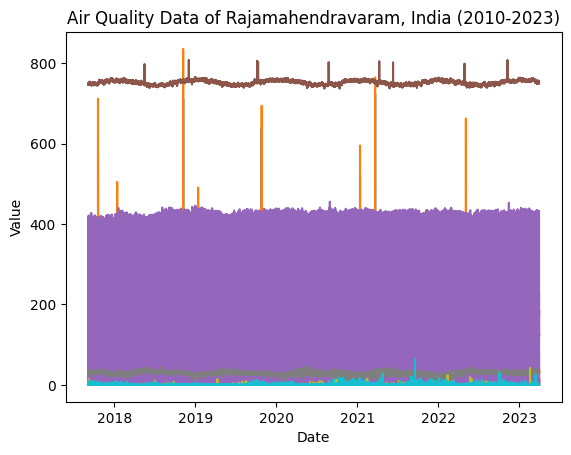

In [28]:
plot_time_series(tsaqdi5, legend=False, title="Air Quality Data of Rajamahendravaram, India (2010-2023)")

# Power consumption in India(2019-2020)

In [29]:
types = {'meantemp': np.float64, 'humidity': np.float64, 'wind_speed': np.float64, 'meanpressure': np.float64}
pci = pd.read_csv('datasets/raw/Power consumption in India(2019-2020)/dataset_tk.csv', parse_dates=[0], dtype=types, date_format ="%d/%m/%Y %H:%M:%S")
pci.rename(columns={pci.columns[0]: 'date'}, inplace=True)
pci = pci[pci['date'].dt.year != 2020]
pci

,date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2019-12-27,103.7,110.4,211.4,63.8,229.9,33.4,29.3,44.2,3.8,...,79.8,112.0,1.7,2.0,20.1,2.6,5.8,2.0,2.1,3.4
355,2019-12-28,97.2,101.7,212.7,62.0,234.2,32.7,27.6,47.7,3.4,...,75.8,108.3,1.6,2.0,19.7,2.5,6.0,1.7,2.1,3.4
356,2019-12-29,237.2,214.1,232.7,128.5,421.3,42.0,29.9,40.0,6.4,...,95.7,166.9,1.0,2.0,34.2,2.4,5.3,1.7,2.1,4.9
357,2019-12-30,251.9,220.1,246.5,126.9,437.4,43.3,31.6,42.8,6.4,...,99.2,173.9,1.1,2.3,35.0,2.4,5.6,1.8,2.1,4.9


In [30]:
data_report(pci, "date")

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 10
4. Number of duplicated timesteps: 5
5. Number of Time Series with missing values : 0
________________________________________________________________


In [31]:
pci3 = check_time_column(pci, "date", fix=True)
pci3

3. Number of missing timesteps: 10
4. Number of duplicated timesteps: 5


,date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2019-12-27,103.7,110.4,211.4,63.8,229.9,33.4,29.3,44.2,3.8,...,79.8,112.0,1.7,2.0,20.1,2.6,5.8,2.0,2.1,3.4
360,2019-12-28,97.2,101.7,212.7,62.0,234.2,32.7,27.6,47.7,3.4,...,75.8,108.3,1.6,2.0,19.7,2.5,6.0,1.7,2.1,3.4
361,2019-12-29,237.2,214.1,232.7,128.5,421.3,42.0,29.9,40.0,6.4,...,95.7,166.9,1.0,2.0,34.2,2.4,5.3,1.7,2.1,4.9
362,2019-12-30,251.9,220.1,246.5,126.9,437.4,43.3,31.6,42.8,6.4,...,99.2,173.9,1.1,2.3,35.0,2.4,5.6,1.8,2.1,4.9


In [32]:
data_report(pci3, "date")

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
Number of missing values in column 'Punjab' : 10
Number of missing values in column 'Haryana' : 10
Number of missing values in column 'Rajasthan' : 10
Number of missing values in column 'Delhi' : 10
Number of missing values in column 'UP' : 10
Number of missing values in column 'Uttarakhand' : 10
Number of missing values in column 'HP' : 10
Number of missing values in column 'J&K' : 10
Number of missing values in column 'Chandigarh' : 10
Number of missing values in column 'Chhattisgarh' : 10
Number of missing values in column 'Gujarat' : 10
Number of missing values in column 'MP' : 10
Number of missing values in column 'Maharashtra' : 10
Number of missing values in 

In [33]:
pci5 = check_missing_values(pci3, alpha=0.1, fix=True, check_na=True)
pci5

30    2019-02-01
58    2019-03-01
89    2019-04-01
119   2019-05-01
150   2019-06-01
217   2019-08-07
248   2019-09-07
278   2019-10-07
309   2019-11-07
339   2019-12-07
Name: date, dtype: datetime64[ns]
Number of missing values in column 'Punjab' : 10
Number of missing values in column 'Haryana' : 10
Number of missing values in column 'Rajasthan' : 10
Number of missing values in column 'Delhi' : 10
Number of missing values in column 'UP' : 10
Number of missing values in column 'Uttarakhand' : 10
Number of missing values in column 'HP' : 10
Number of missing values in column 'J&K' : 10
Number of missing values in column 'Chandigarh' : 10
Number of missing values in column 'Chhattisgarh' : 10
Number of missing values in column 'Gujarat' : 10
Number of missing values in column 'MP' : 10
Number of missing values in column 'Maharashtra' : 10
Number of missing values in column 'Goa' : 10
Number of missing values in column 'DNH' : 10
Number of missing values in column 'Andhra Pradesh' : 10
N

,date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2019-12-27,103.7,110.4,211.4,63.8,229.9,33.4,29.3,44.2,3.8,...,79.8,112.0,1.7,2.0,20.1,2.6,5.8,2.0,2.1,3.4
360,2019-12-28,97.2,101.7,212.7,62.0,234.2,32.7,27.6,47.7,3.4,...,75.8,108.3,1.6,2.0,19.7,2.5,6.0,1.7,2.1,3.4
361,2019-12-29,237.2,214.1,232.7,128.5,421.3,42.0,29.9,40.0,6.4,...,95.7,166.9,1.0,2.0,34.2,2.4,5.3,1.7,2.1,4.9
362,2019-12-30,251.9,220.1,246.5,126.9,437.4,43.3,31.6,42.8,6.4,...,99.2,173.9,1.1,2.3,35.0,2.4,5.6,1.8,2.1,4.9


In [34]:
data_report(pci5, "date")

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [35]:
pci5

,date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2019-12-27,103.7,110.4,211.4,63.8,229.9,33.4,29.3,44.2,3.8,...,79.8,112.0,1.7,2.0,20.1,2.6,5.8,2.0,2.1,3.4
360,2019-12-28,97.2,101.7,212.7,62.0,234.2,32.7,27.6,47.7,3.4,...,75.8,108.3,1.6,2.0,19.7,2.5,6.0,1.7,2.1,3.4
361,2019-12-29,237.2,214.1,232.7,128.5,421.3,42.0,29.9,40.0,6.4,...,95.7,166.9,1.0,2.0,34.2,2.4,5.3,1.7,2.1,4.9
362,2019-12-30,251.9,220.1,246.5,126.9,437.4,43.3,31.6,42.8,6.4,...,99.2,173.9,1.1,2.3,35.0,2.4,5.6,1.8,2.1,4.9


In [36]:
#pci5.to_csv('datasets/processed_data/power_comsumption_india_14052024.csv', index=False)

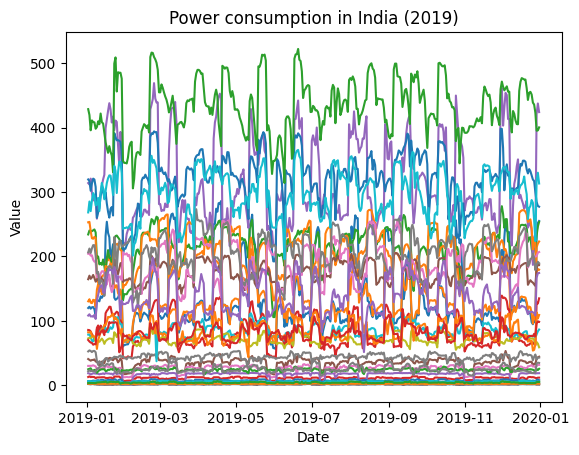

In [37]:
plot_time_series(pci5, legend=False, title="Power consumption in India (2019)")

# Daily Exchange Rates per Euro 1999-2024

In [38]:
dwrpe = pd.read_csv('datasets/raw/Daily Exchange Rates per Euro 1999-2024/euro-daily-hist_1999_2024.csv', parse_dates=[r'Period\Unit:'], na_values = [""])
dwrpe.rename(columns={dwrpe.columns[0]: 'date'}, inplace=True)
dwrpe

,date,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2024-04-11,1.6448,1.9558,5.4468,1.4688,0.9787,7.7646,NaN,25.392,7.4604,...,4.9713,NaN,11.531,1.4518,NaN,NaN,39.22,34.6336,1.0729,20.1614
1,2024-04-10,1.6399,1.9558,5.433,1.4728,0.981,7.8548,NaN,25.368,7.4594,...,4.9690,NaN,11.4345,1.4605,NaN,NaN,39.536,35.0329,1.086,20.0851
2,2024-04-09,1.6407,1.9558,5.4489,1.4749,0.9819,7.8603,NaN,25.38,7.459,...,4.9682,NaN,11.4555,1.4623,NaN,NaN,39.529,34.9828,1.0867,20.0861
3,2024-04-08,1.6433,1.9558,5.4806,1.4715,0.9807,7.8282,NaN,25.354,7.4588,...,4.9681,NaN,11.4675,1.4607,NaN,NaN,39.769,34.8481,1.0823,20.1574
4,2024-04-05,1.6461,1.9558,5.4633,1.4702,0.9793,7.8421,NaN,25.286,7.459,...,4.9677,NaN,11.526,1.4608,NaN,NaN,39.743,34.6312,1.0841,20.171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6530,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6531,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6532,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6533,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [39]:
data_report(dwrpe, "date")

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
Column '[Australian dollar ]' type is not float or int: object
Column '[Bulgarian lev ]' type is not float or int: object
Column '[Brazilian real ]' type is not float or int: object
Column '[Canadian dollar ]' type is not float or int: object
Column '[Swiss franc ]' type is not float or int: object
Column '[Chinese yuan renminbi ]' type is not float or int: object
Column '[Cypriot pound ]' type is not float or int: object
Column '[Czech koruna ]' type is not float or int: object
Column '[Danish krone ]' type is not float or int: object
Column '[Estonian kroon ]' type is not float or int: object
Column '[UK pound sterling ]' type is not float or int: object
Column '[Greek drachma ]' type is not float or int: object
Column '[Hong Kong dollar ]' type is not float or int:

In [40]:

dwrpe2 = dwrpe.copy()
for col in dwrpe.columns[1:]:
    dwrpe2[col] = pd.to_numeric(dwrpe[col], errors='coerce')

In [41]:
data_report(dwrpe2, "date", business_days=True)

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 59
4. Number of duplicated timesteps: 0
Number of missing values in column '[Australian dollar ]' : 62
Number of missing values in column '[Bulgarian lev ]' : 460
Number of missing values in column '[Brazilian real ]' : 329
Number of missing values in column '[Canadian dollar ]' : 62
Number of missing values in column '[Swiss franc ]' : 62
Number of missing values in column '[Chinese yuan renminbi ]' : 329
Number of missing values in column '[Cypriot pound ]' : 4231
Number of missing values in column '[Czech koruna ]' : 62
Number of missing values in column '[Danish krone ]' : 62
Number of missing values in column '[Estonian kroon ]' : 3461
Number of missing values in column '[UK pound sterling ]' : 62
N

In [42]:
dwrpe3 = check_time_column(dwrpe2, "date", business_days=True, fix = True)

3. Number of missing timesteps: 59
4. Number of duplicated timesteps: 0


In [43]:
data_report(dwrpe3, "date", business_days=True)

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
Number of missing values in column '[Australian dollar ]' : 121
Number of missing values in column '[Bulgarian lev ]' : 519
Number of missing values in column '[Brazilian real ]' : 388
Number of missing values in column '[Canadian dollar ]' : 121
Number of missing values in column '[Swiss franc ]' : 121
Number of missing values in column '[Chinese yuan renminbi ]' : 388
Number of missing values in column '[Cypriot pound ]' : 4290
Number of missing values in column '[Czech koruna ]' : 121
Number of missing values in column '[Danish krone ]' : 121
Number of missing values in column '[Estonian kroon ]' : 3520
Number of missing values in column '[UK pound sterling ]' : 

In [44]:
dwrpe5 = check_missing_values(dwrpe3, 0.1, fix=True)

Number of missing values in column '[Australian dollar ]' : 121
Number of missing values in column '[Bulgarian lev ]' : 519
Number of missing values in column '[Brazilian real ]' : 388
Number of missing values in column '[Canadian dollar ]' : 121
Number of missing values in column '[Swiss franc ]' : 121
Number of missing values in column '[Chinese yuan renminbi ]' : 388
Number of missing values in column '[Czech koruna ]' : 121
Number of missing values in column '[Danish krone ]' : 121
Number of missing values in column '[UK pound sterling ]' : 121
Number of missing values in column '[Hong Kong dollar ]' : 121
Number of missing values in column '[Hungarian forint ]' : 121
Number of missing values in column '[Indonesian rupiah ]' : 121
Number of missing values in column '[Israeli shekel ]' : 389
Number of missing values in column '[Indian rupee ]' : 388
Number of missing values in column '[Japanese yen ]' : 121
Number of missing values in column '[Korean won ]' : 121
Number of missing v

In [45]:
data_report(dwrpe5, "date", business_days=True)

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
Number of missing values in column '[Bulgarian lev ]' : 402
Number of missing values in column '[Brazilian real ]' : 268
Number of missing values in column '[Chinese yuan renminbi ]' : 268
Number of missing values in column '[Israeli shekel ]' : 268
Number of missing values in column '[Indian rupee ]' : 268
5. Number of Time Series with missing values : 5
________________________________________________________________


In [46]:
dwrpe5_corr = dwrpe5.drop(columns=['[Bulgarian lev ]', '[Brazilian real ]', '[Chinese yuan renminbi ]', '[Israeli shekel ]', '[Indian rupee ]'])
dwrpe5_corr

,date,[Australian dollar ],[Canadian dollar ],[Swiss franc ],[Czech koruna ],[Danish krone ],[UK pound sterling ],[Hong Kong dollar ],[Hungarian forint ],[Indonesian rupiah ],...,[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Swedish krona ],[Singapore dollar ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,1999-01-04,1.9100,1.8004,1.6168,35.107,7.4501,0.71110,9.1332,251.48,9433.61,...,2.2229,45.510,4.0712,1.3111,9.4696,1.9554,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,1.7965,1.6123,34.917,7.4495,0.71220,9.1341,250.80,9314.51,...,2.2011,44.745,4.0245,1.3168,9.4025,1.9655,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,1.7711,1.6116,34.850,7.4452,0.70760,9.1010,250.67,9337.68,...,2.1890,44.872,4.0065,1.3168,9.3050,1.9699,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,1.7602,1.6165,34.886,7.4431,0.70585,9.0131,250.09,9218.77,...,2.1531,44.436,4.0165,1.3092,9.1800,1.9436,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,1.7643,1.6138,34.938,7.4433,0.70940,9.0302,250.15,9321.63,...,2.1557,44.295,4.0363,1.3143,9.1650,1.9537,42.5590,0.3718,1.1659,6.7855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6589,2024-04-05,1.6461,1.4702,0.9793,25.286,7.4590,0.85773,8.4868,390.10,17192.63,...,1.8001,61.268,4.2835,4.9677,11.5260,1.4608,39.7430,34.6312,1.0841,20.1710
6590,2024-04-08,1.6433,1.4715,0.9807,25.354,7.4588,0.85795,8.4761,390.78,17217.66,...,1.7984,61.204,4.2773,4.9681,11.4675,1.4607,39.7690,34.8481,1.0823,20.1574
6591,2024-04-09,1.6407,1.4749,0.9819,25.380,7.4590,0.85663,8.5096,389.20,17243.05,...,1.7938,61.301,4.2565,4.9682,11.4555,1.4623,39.5290,34.9828,1.0867,20.0861
6592,2024-04-10,1.6399,1.4728,0.9810,25.368,7.4594,0.85515,8.5060,389.18,17212.45,...,1.7856,61.408,4.2563,4.9690,11.4345,1.4605,39.5360,35.0329,1.0860,20.0851


In [47]:
data_report(dwrpe5_corr, "date", business_days=True)

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [48]:
#dwrpe5_corr.to_csv("datasets/processed_data/euro-daily-hist_1999_2024_14052024.csv", index=False)

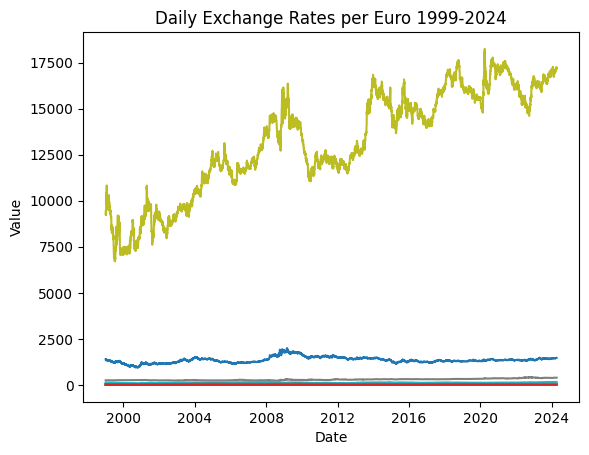

In [49]:
plot_time_series(dwrpe5_corr, legend=False, title="Daily Exchange Rates per Euro 1999-2024")

# Noninvasive Fetal ECG: PhysioNet Challenge 2013

In [50]:
nife = pd.read_csv('datasets/raw/Noninvasive Fetal ECG PhysioNet Challenge 2013/set-b/set-b/b00.csv', header=0, skiprows = 1,parse_dates=["'seconds'"],   date_format = '%S.%f')
nife.rename(columns={nife.columns[0]: 'seconds'}, inplace=True)
nife

,seconds,'uV','uV'.1,'uV'.2,'uV'.3
0,1900-01-01 00:00:00.000,-39.0,-117.0,-69.5,-46.5
1,1900-01-01 00:00:00.001,-33.5,-110.5,-62.0,-39.0
2,1900-01-01 00:00:00.002,-27.5,-104.0,-55.0,-31.5
3,1900-01-01 00:00:00.003,-22.0,-97.0,-47.5,-24.0
4,1900-01-01 00:00:00.004,-16.5,-91.0,-40.0,-16.5
...,...,...,...,...,...
59995,1900-01-01 00:00:59.995,-95.5,-101.0,-160.5,-180.0
59996,1900-01-01 00:00:59.996,-93.5,-98.5,-158.0,-176.5
59997,1900-01-01 00:00:59.997,-91.5,-96.0,-154.5,-173.0
59998,1900-01-01 00:00:59.998,-89.0,-93.0,-150.5,-169.0


In [51]:
data_report(nife, "seconds", freq='ms')

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


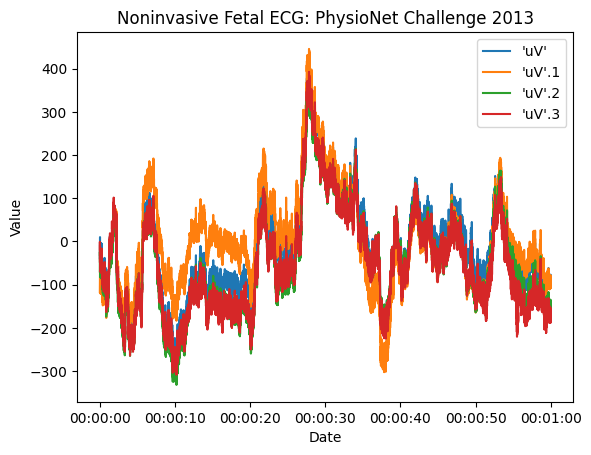

In [52]:
plot_time_series(nife, legend=True, title="Noninvasive Fetal ECG: PhysioNet Challenge 2013")

In [53]:
#nife.to_csv("datasets/processed_data/non_invasive_fetal_ecg_15052024.csv", index=False)

# Torque Characteristics of a Permanent Magnet Motor

In [54]:
tcpmm = pd.read_csv('datasets/raw/Torque Characteristics of a Permanent Magnet Motor/Time_series_120rpm.csv')
tcpmm_op1 = tcpmm[tcpmm['OP'] == 1].copy()
tcpmm_op1.drop(columns='OP', inplace=True)

In [55]:
tcpmm_op1['time in s'] = pd.to_timedelta(tcpmm_op1['time in s'], unit='s')
base_date = pd.Timestamp('1900-01-01')
tcpmm_op1['time in s'] = base_date + tcpmm_op1['time in s']

In [56]:
data_report(tcpmm_op1, "time in s", freq = 'us')

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
Number of missing values in column 'u_dc in V' : 71
Number of missing values in column 's_n' : 46
5. Number of Time Series with missing values : 2
________________________________________________________________


In [57]:
tcpmm_op1_5= check_missing_values(tcpmm_op1, alpha=0.1, fix=True, check_na=False)

Number of missing values in column 'u_dc in V' : 71
Number of missing values in column 's_n' : 46
5. Number of Time Series with missing values : 2


In [58]:
data_report(tcpmm_op1_5, "time in s", freq = 'us')
tcpmm_op1_5.drop(columns='s_n', inplace=True)

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
Number of missing values in column 's_n' : 28
5. Number of Time Series with missing values : 1
________________________________________________________________


In [59]:
tcpmm_op1_5

,time in s,i_a in A,i_b in A,i_c in A,u_a in V,u_b in V,u_c in V,u_dc in V,epsilon_el in rad
0,1900-01-01 00:00:00.000000,1.765625,3.453125,0.937500,-0.322917,-0.677083,1.000000,294.2358,-2.403804
1,1900-01-01 00:00:00.000001,1.578125,3.421875,0.859375,-0.177083,-0.750000,0.927083,294.2249,-2.403765
2,1900-01-01 00:00:00.000002,1.578125,3.562500,0.750000,-0.114583,-0.854167,0.968750,294.2141,-2.403726
3,1900-01-01 00:00:00.000003,1.765625,3.671875,0.640625,-0.104167,-0.822917,0.927083,294.2032,-2.403687
4,1900-01-01 00:00:00.000004,1.656250,3.671875,0.609375,-0.125000,-0.802083,0.927083,294.1923,-2.403648
...,...,...,...,...,...,...,...,...,...
499995,1900-01-01 00:00:00.499995,0.968750,3.765625,0.218750,0.354167,-1.385417,1.031250,294.6708,-2.403677
499996,1900-01-01 00:00:00.499996,1.015625,3.828125,0.437500,0.145833,-1.291667,1.145833,294.6708,-2.403639
499997,1900-01-01 00:00:00.499997,1.046875,3.953125,0.562500,-0.197917,-1.135417,1.333333,294.6708,-2.403600
499998,1900-01-01 00:00:00.499998,1.125000,3.765625,0.609375,-0.281250,-1.229167,1.510417,294.6708,-2.403561


In [60]:
data_report(tcpmm_op1_5, "time in s", freq = 'us')

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [61]:
tcpmm_op1_5

,time in s,i_a in A,i_b in A,i_c in A,u_a in V,u_b in V,u_c in V,u_dc in V,epsilon_el in rad
0,1900-01-01 00:00:00.000000,1.765625,3.453125,0.937500,-0.322917,-0.677083,1.000000,294.2358,-2.403804
1,1900-01-01 00:00:00.000001,1.578125,3.421875,0.859375,-0.177083,-0.750000,0.927083,294.2249,-2.403765
2,1900-01-01 00:00:00.000002,1.578125,3.562500,0.750000,-0.114583,-0.854167,0.968750,294.2141,-2.403726
3,1900-01-01 00:00:00.000003,1.765625,3.671875,0.640625,-0.104167,-0.822917,0.927083,294.2032,-2.403687
4,1900-01-01 00:00:00.000004,1.656250,3.671875,0.609375,-0.125000,-0.802083,0.927083,294.1923,-2.403648
...,...,...,...,...,...,...,...,...,...
499995,1900-01-01 00:00:00.499995,0.968750,3.765625,0.218750,0.354167,-1.385417,1.031250,294.6708,-2.403677
499996,1900-01-01 00:00:00.499996,1.015625,3.828125,0.437500,0.145833,-1.291667,1.145833,294.6708,-2.403639
499997,1900-01-01 00:00:00.499997,1.046875,3.953125,0.562500,-0.197917,-1.135417,1.333333,294.6708,-2.403600
499998,1900-01-01 00:00:00.499998,1.125000,3.765625,0.609375,-0.281250,-1.229167,1.510417,294.6708,-2.403561


In [62]:
plot_time_series(tcpmm_op1_5, legend=True, title="Torque Characteristics of a Permanent Magnet Motor")

KeyboardInterrupt: 

In [63]:
#tcpmm_op1_5.to_csv("datasets/processed_data/torque_characteristics_15052024.csv", index=False)

# EEG-Alcohol

In [64]:
eega = pd.read_csv('datasets/raw/EEG-Alcohol/SMNI_CMI_TRAIN/train/Data1.csv', index_col=0).reset_index(drop=True)
eega = check_column_order(eega, "time", fix=True)
eega = eega[eega['sensor position'] == 'FP1']
eega.drop(columns =['trial number', 'sensor position', 'sample num', 'subject identifier', 'matching condition', 'channel', 'name'],inplace=True)

1. FAILED: First column is not time column!


In [65]:
eega['time'] = pd.to_timedelta(eega['time'], unit='s')
base_date = pd.Timestamp('1900-01-01')
eega['time'] = base_date + eega['time']
eega

,time,sensor value
0,1900-01-01 00:00:00.000000000,-8.921
1,1900-01-01 00:00:00.003906250,-8.433
2,1900-01-01 00:00:00.007812500,-2.574
3,1900-01-01 00:00:00.011718750,5.239
4,1900-01-01 00:00:00.015625000,11.587
...,...,...
251,1900-01-01 00:00:00.980468750,3.286
252,1900-01-01 00:00:00.984375000,3.774
253,1900-01-01 00:00:00.988281250,4.262
254,1900-01-01 00:00:00.992187500,5.727


In [66]:
data_report(eega, 'time', freq=timedelta(microseconds=(1 / 256) * 1_000_000))

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


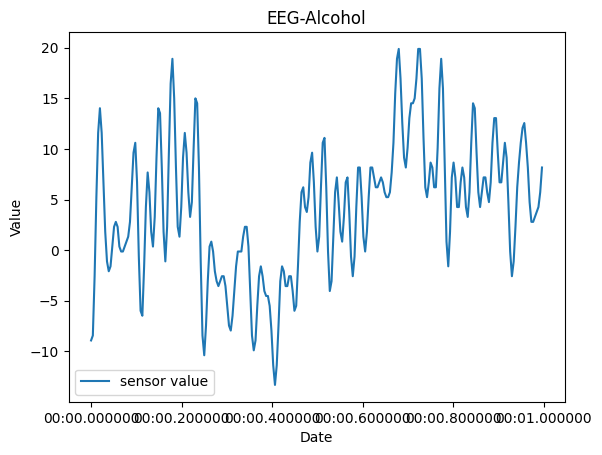

In [67]:
plot_time_series(eega, legend=True, title="EEG-Alcohol")

In [68]:
#eega.to_csv("datasets/processed_data/ecg_alcohol_17052024.csv", index=False)

# Traffic Prediction Dataset

In [69]:
tpd = pd.read_csv('datasets/raw/Traffic Prediction Dataset/traffic.csv', parse_dates=['DateTime'])
tpd

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [70]:
tpd_p = tpd.pivot(index='DateTime', columns='Junction', values='Vehicles').reset_index()
tpd_p.columns =['DateTime','Junction 1', 'Junction 2', 'Junction 3', 'Junction 4']
tpd_p


,DateTime,Junction 1,Junction 2,Junction 3,Junction 4
0,2015-11-01 00:00:00,15.0,6.0,9.0,NaN
1,2015-11-01 01:00:00,13.0,6.0,7.0,NaN
2,2015-11-01 02:00:00,10.0,5.0,5.0,NaN
3,2015-11-01 03:00:00,7.0,6.0,1.0,NaN
4,2015-11-01 04:00:00,9.0,7.0,2.0,NaN
...,...,...,...,...,...
14587,2017-06-30 19:00:00,105.0,34.0,33.0,11.0
14588,2017-06-30 20:00:00,96.0,35.0,31.0,30.0
14589,2017-06-30 21:00:00,90.0,31.0,28.0,16.0
14590,2017-06-30 22:00:00,84.0,29.0,26.0,22.0


In [71]:
tpd_p.drop(columns = 'Junction 4', inplace=True)
data_report(tpd_p, 'DateTime', freq='h')

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [72]:
#tpd_p.to_csv("datasets/processed_data/traffic_17052024.csv", index=False)

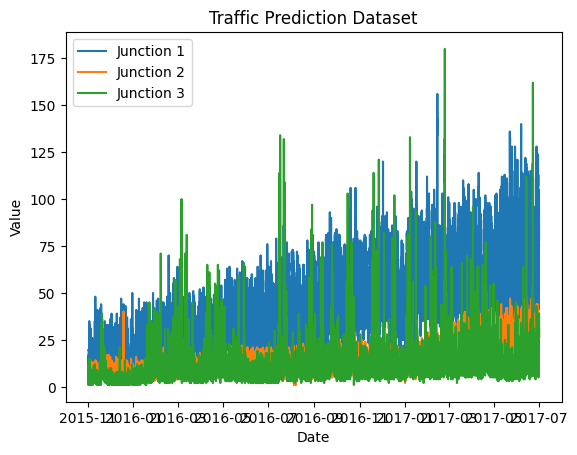

In [103]:
plot_time_series(tpd_p, title='Traffic Prediction Dataset')

# Pharma Sales Data

In [74]:
phd = pd.read_csv('datasets/raw/Pharma Sales Data/salesweekly.csv', parse_dates=['datum'])
phd

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-05,14.00,11.670,21.30,185.950,41.0,0.0,32.000000,7.00
1,2014-01-12,29.33,12.680,37.90,190.700,88.0,5.0,21.000000,7.20
2,2014-01-19,30.67,26.340,45.90,218.400,80.0,8.0,29.000000,12.00
3,2014-01-26,34.00,32.370,31.50,179.600,80.0,8.0,23.000000,10.00
4,2014-02-02,31.02,23.350,20.70,159.880,84.0,12.0,29.000000,12.00
...,...,...,...,...,...,...,...,...,...
297,2019-09-15,35.51,30.977,19.65,178.375,67.2,5.0,30.000000,30.50
298,2019-09-22,46.84,25.396,24.40,248.250,31.2,3.0,26.000000,21.00
299,2019-09-29,34.01,22.498,26.60,336.700,61.2,1.0,40.416667,23.10
300,2019-10-06,38.70,32.502,19.25,249.450,69.0,5.0,30.000000,12.13


In [75]:
data_report(phd, 'datum', freq='W')

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [76]:
#phd.to_csv("datasets/processed_data/pharma_sales_17052024.csv", index=False)

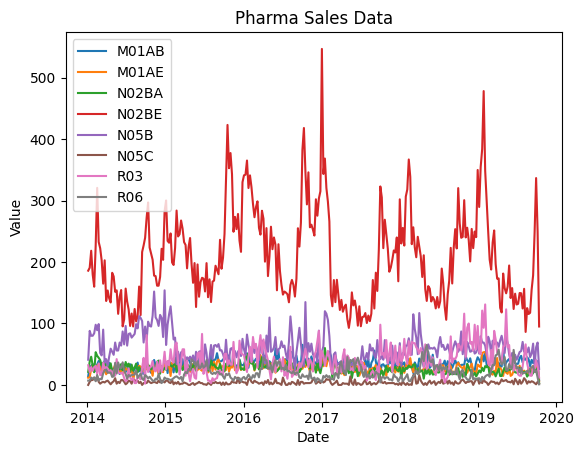

In [104]:
plot_time_series(phd, title='Pharma Sales Data')

# Flights Data

No in use!!!!!!

In [77]:
fd = pd.read_csv('datasets/raw/Flights Data/nycflights.csv')
fd['datetime'] = pd.to_datetime(fd[['day', 'month', 'year', 'hour', 'minute']], dayfirst=True)
fd.drop(columns = ['day', 'month', 'year', 'hour', 'minute'], inplace = True)
fd = check_column_order(fd, 'datetime', fix=True)

1. FAILED: First column is not time column!


In [78]:
fd[['origin','dest']].drop_duplicates()

,origin,dest
0,JFK,LAX
1,JFK,SJU
3,JFK,TPA
4,LGA,ORF
5,LGA,ORD
...,...,...
15519,LGA,AVL
16173,LGA,BWI
16641,JFK,PSP
20167,LGA,CAE


In [79]:

fd = pd.read_csv('datasets/raw/Flights Data/nycflights.csv', dayfirst=True)

# Step 2: Combine the date and time columns using pd.to_datetime
fd['datetime'] = pd.to_datetime(fd[['day', 'month', 'year', 'hour', 'minute']], dayfirst=True)

# Now you can work with 'datetime' as your combined date-time column


# Public transport traffic data in France

No in use!!!!!!

In [80]:
pttf = pd.read_csv('datasets/raw/Public transport traffic data in France/Regularities_by_liaisons_Trains_France.csv')
pttf['Day'] = 1
pttf['datetime'] = pd.to_datetime(pttf[['Day','Month', 'Year']], dayfirst=True)
pttf.drop(columns = ['Day','Month', 'Year'], inplace = True)
pttf = check_column_order(pttf, 'datetime', fix=True)
pttf

1. FAILED: First column is not time column!


,datetime,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,...,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019-07-01,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,NaN,...,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019-07-01,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,NaN,...,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019-07-01,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,NaN,...,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019-07-01,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,NaN,...,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019-07-01,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,NaN,...,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7801,2020-05-01,PARIS LYON,AVIGNON TGV,162.702381,191.0,23.0,50.0,5.359667,1.201190,NaN,...,46.264583,4.0,1.0,2020-05,27.272727,18.181818,9.090909,36.363636,9.090909,0.000000
7802,2020-05-01,PARIS LYON,MARSEILLE ST CHARLES,197.241206,227.0,28.0,54.0,5.702160,1.125963,NaN,...,49.050000,6.0,1.0,2020-05,30.000000,30.000000,10.000000,30.000000,0.000000,0.000000
7803,2020-05-01,PARIS LYON,NIMES,182.094828,129.0,13.0,20.0,2.996667,0.040517,NaN,...,48.305556,1.0,1.0,2020-05,20.000000,80.000000,0.000000,0.000000,0.000000,0.000000
7804,2020-05-01,PARIS LYON,SAINT ETIENNE CHATEAUCREUX,NaN,NaN,4.0,0.0,0.000000,NaN,NaN,...,NaN,NaN,NaN,2020-05,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
pttf[['Departure station', 'Arrival station']].drop_duplicates()

,Departure station,Arrival station
0,ANGOULEME,PARIS MONTPARNASSE
1,PARIS MONTPARNASSE,LA ROCHELLE VILLE
2,LE MANS,PARIS MONTPARNASSE
3,ST MALO,PARIS MONTPARNASSE
4,PARIS MONTPARNASSE,ST PIERRE DES CORPS
...,...,...
856,PARIS LYON,BARCELONA
1210,PARIS VAUGIRARD,RENNES
1292,PARIS VAUGIRARD,BORDEAUX ST JEAN
1384,PARIS VAUGIRARD,NANTES


In [82]:
pttf.datetime.unique()

<DatetimeArray>
['2019-07-01 00:00:00', '2018-03-01 00:00:00', '2018-08-01 00:00:00',
 '2018-07-01 00:00:00', '2019-03-01 00:00:00', '2019-01-01 00:00:00',
 '2018-12-01 00:00:00', '2018-10-01 00:00:00', '2018-11-01 00:00:00',
 '2018-09-01 00:00:00', '2019-02-01 00:00:00', '2019-04-01 00:00:00',
 '2019-06-01 00:00:00', '2019-05-01 00:00:00', '2015-04-01 00:00:00',
 '2017-09-01 00:00:00', '2017-01-01 00:00:00', '2017-07-01 00:00:00',
 '2015-03-01 00:00:00', '2015-02-01 00:00:00', '2015-08-01 00:00:00',
 '2015-11-01 00:00:00', '2017-12-01 00:00:00', '2015-09-01 00:00:00',
 '2016-03-01 00:00:00', '2015-12-01 00:00:00', '2016-05-01 00:00:00',
 '2016-01-01 00:00:00', '2016-08-01 00:00:00', '2016-04-01 00:00:00',
 '2016-06-01 00:00:00', '2016-02-01 00:00:00', '2017-04-01 00:00:00',
 '2016-09-01 00:00:00', '2016-11-01 00:00:00', '2017-11-01 00:00:00',
 '2017-03-01 00:00:00', '2016-12-01 00:00:00', '2016-07-01 00:00:00',
 '2015-10-01 00:00:00', '2017-08-01 00:00:00', '2016-10-01 00:00:00',
 '20

In [83]:
pttf.groupby(by=['Departure station', 'Arrival station']).count()

,,datetime,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Comment (optional) delays at departure,Number of trains late on arrival,Average delay of late arriving trains (min),...,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
Departure station,Arrival station,,,,,,,,,,,,,,,,,,,,,
AIX EN PROVENCE TGV,PARIS LYON,66,66,66,66,66,66,66,0,66,66,...,66,66,66,66,66,66,66,66,66,66
ANGERS SAINT LAUD,PARIS MONTPARNASSE,66,66,66,66,66,66,66,0,66,66,...,66,66,66,66,66,66,66,66,66,66
ANGOULEME,PARIS MONTPARNASSE,66,66,66,66,66,66,66,0,66,66,...,66,66,66,66,66,66,66,66,66,66
ANNECY,PARIS LYON,66,65,65,66,66,66,65,0,64,64,...,64,65,65,66,63,63,63,63,63,63
ARRAS,PARIS NORD,66,66,66,66,66,66,66,0,66,66,...,66,66,66,66,66,66,66,66,66,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TOURCOING,MARSEILLE ST CHARLES,12,12,12,12,12,12,12,0,10,10,...,12,12,12,12,9,9,9,9,9,9
TOURS,PARIS MONTPARNASSE,66,65,65,66,66,66,65,0,65,65,...,62,65,65,66,65,65,65,65,65,65
VALENCE ALIXAN TGV,PARIS LYON,66,66,66,66,66,66,66,0,66,66,...,66,66,66,66,66,66,66,66,66,66


# Metro Interstate Traffic Volume

In [84]:
mitv = pd.read_csv('datasets/raw/Metro Interstate Traffic Volume/Metro_Interstate_Traffic_Volume.csv', parse_dates=['date_time'])
mitv = mitv[['date_time', 'traffic_volume']]
mitv = mitv[mitv.date_time.dt.year >= 2016]

In [85]:
hours = mitv.date_time.dt.hour.unique()
hours.sort()
hours

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [86]:
mitv.drop_duplicates(inplace=True)

In [87]:
data_report(mitv, 'date_time', freq='h')

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 1012
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [88]:
mitv3 = check_time_column(mitv, 'date_time', freq='h', fix=True)
mitv3

3. Number of missing timesteps: 1012
4. Number of duplicated timesteps: 0


,date_time,traffic_volume
0,2016-01-01 00:00:00,1513.0
1,2016-01-01 01:00:00,1550.0
2,2016-01-01 02:00:00,NaN
3,2016-01-01 03:00:00,719.0
4,2016-01-01 04:00:00,533.0
...,...,...
24091,2018-09-30 19:00:00,3543.0
24092,2018-09-30 20:00:00,2781.0
24093,2018-09-30 21:00:00,2159.0
24094,2018-09-30 22:00:00,1450.0


In [89]:
mitv5 = check_missing_values(mitv3, 0.25, fix=True )
mitv5

Number of missing values in column 'traffic_volume' : 1012
5. Number of Time Series with missing values : 1


,date_time,traffic_volume
0,2016-01-01 00:00:00,1513.0
1,2016-01-01 01:00:00,1550.0
2,2016-01-01 02:00:00,1550.0
3,2016-01-01 03:00:00,719.0
4,2016-01-01 04:00:00,533.0
...,...,...
24091,2018-09-30 19:00:00,3543.0
24092,2018-09-30 20:00:00,2781.0
24093,2018-09-30 21:00:00,2159.0
24094,2018-09-30 22:00:00,1450.0


In [90]:
data_report(mitv5, 'date_time', freq='h')

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


In [91]:
mitv5

,date_time,traffic_volume
0,2016-01-01 00:00:00,1513.0
1,2016-01-01 01:00:00,1550.0
2,2016-01-01 02:00:00,1550.0
3,2016-01-01 03:00:00,719.0
4,2016-01-01 04:00:00,533.0
...,...,...
24091,2018-09-30 19:00:00,3543.0
24092,2018-09-30 20:00:00,2781.0
24093,2018-09-30 21:00:00,2159.0
24094,2018-09-30 22:00:00,1450.0


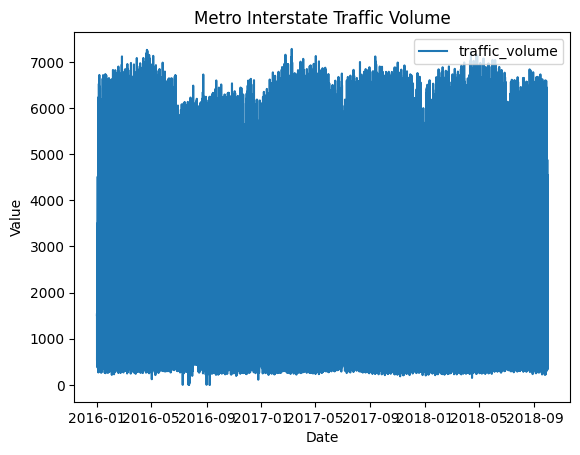

In [92]:
plot_time_series(mitv5, title='Metro Interstate Traffic Volume')

In [93]:
#mitv5.to_csv("datasets/processed_data/metro_nyc_17052024.csv", index=False)

# Covid-19 Global Dataset

In [94]:
c19 = pd.read_csv('datasets/raw/Covid-19 Global Dataset/worldometer_coronavirus_daily_data.csv', parse_dates=['date'])
countries = list(c19.country.unique())[0:30]
new_columns = ['date'] + countries
c19 = c19.pivot(index = 'date', columns='country', values='daily_new_deaths')[countries]
c19.dropna(how='all')
c19.reset_index(inplace = True)
c19.columns = new_columns
c19

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,...,Benin,Bermuda,Bhutan,Bolivia,Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei Darussalam,Bulgaria
0,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,2022-05-10,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,195.0,0.0,0.0,13.0
840,2022-05-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,1.0,2.0,0.0,121.0,0.0,0.0,12.0
841,2022-05-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,136.0,0.0,0.0,16.0
842,2022-05-13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,130.0,0.0,1.0,8.0


In [95]:
data_report(c19, 'date', freq='D')

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
Number of missing values in column 'Afghanistan' : 34
Number of missing values in column 'Albania' : 50
Number of missing values in column 'Algeria' : 35
Number of missing values in column 'Andorra' : 41
Number of missing values in column 'Angola' : 68
Number of missing values in column 'Anguilla' : 609
Number of missing values in column 'Antigua And Barbuda' : 77
Number of missing values in column 'Argentina' : 46
Number of missing values in column 'Armenia' : 40
Number of missing values in column 'Aruba' : 85
Number of missing values in column 'Australia' : 29
Number of missing values in column 'Austria' : 35
Number of missing values in column 'Azerbaijan' : 38
Nu

In [96]:
#c195 = check_missing_values(c19, 0.1, fix=True)

In [97]:
c19_adjust = c19.fillna(0)
c19_adjust

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,...,Benin,Bermuda,Bhutan,Bolivia,Bosnia And Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei Darussalam,Bulgaria
0,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,2022-05-10,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,195.0,0.0,0.0,13.0
840,2022-05-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,1.0,2.0,0.0,121.0,0.0,0.0,12.0
841,2022-05-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,136.0,0.0,0.0,16.0
842,2022-05-13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,130.0,0.0,1.0,8.0


In [98]:
data_report(c19_adjust, 'date', freq='D')

________________________________________________________________
                          DATA REPORT                          
________________________________________________________________
1. Column order is correct!
2. All column types are correct!
3. Number of missing timesteps: 0
4. Number of duplicated timesteps: 0
5. Number of Time Series with missing values : 0
________________________________________________________________


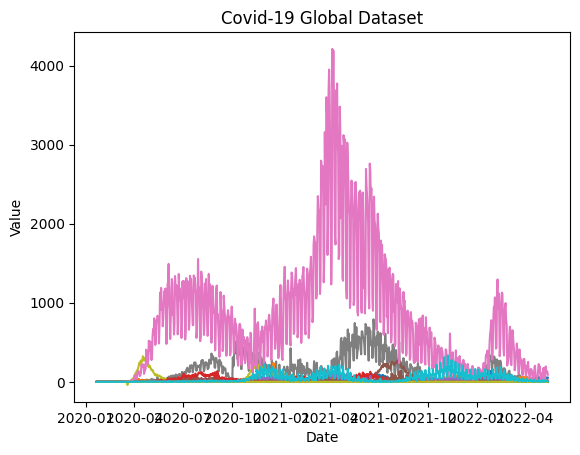

In [99]:
plot_time_series(c19_adjust, legend=False, title='Covid-19 Global Dataset')

In [100]:
c19_adjust.to_csv("datasets/processed_data/covid19_17052024.csv", index=False)

In [101]:
#Total Number of Time Series
(4 + 1 + 14 + 16) + (4 + 1 + 8 + 30) + (1 + 20 + 7) + (33 + 8 + 5) + (37 + 24) + (8 + 6 + 36) + (1 + 3 + 1)


268